In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import scipy.stats as st
import statsmodels.stats.api as sms

timestamp – дата и время (точность до часа)

cnt – количество аренд велосипедов за этот час

t1 – температура, в С

t2 – температура "ощущается как", в С 

hum – влажность (%)

wind_speed – скорость ветра, км/ч

weather_code – погодные условия:

1 – ясно (SKC)
2 – преимущественно ясно / встречаются отдельные облака (SCT)
3 – облачно / значительные облака (BKN)
4 – пасмурно (OVC)
7 – небольшой дождь Rain/ light Rain shower/ Light rain 
10 – дождь с грозой
26 – снегопад 
94 – ледяной туман (да, такое бывает!)

isholiday – является ли день праздником (1 – праздник, 0 – нет)

isweekend –  является ли день выходным (1 – выходной, 0 – нет)

season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. 
Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

In [2]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [3]:
df.shape

(17414, 10)

In [4]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [20]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


2. Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)
по оси y – число поездок (cnt)
Выберите верные утверждения:

Hint: sns.lineplot

In [7]:
sns.set(rc={'figure.figsize':(20, 10)})

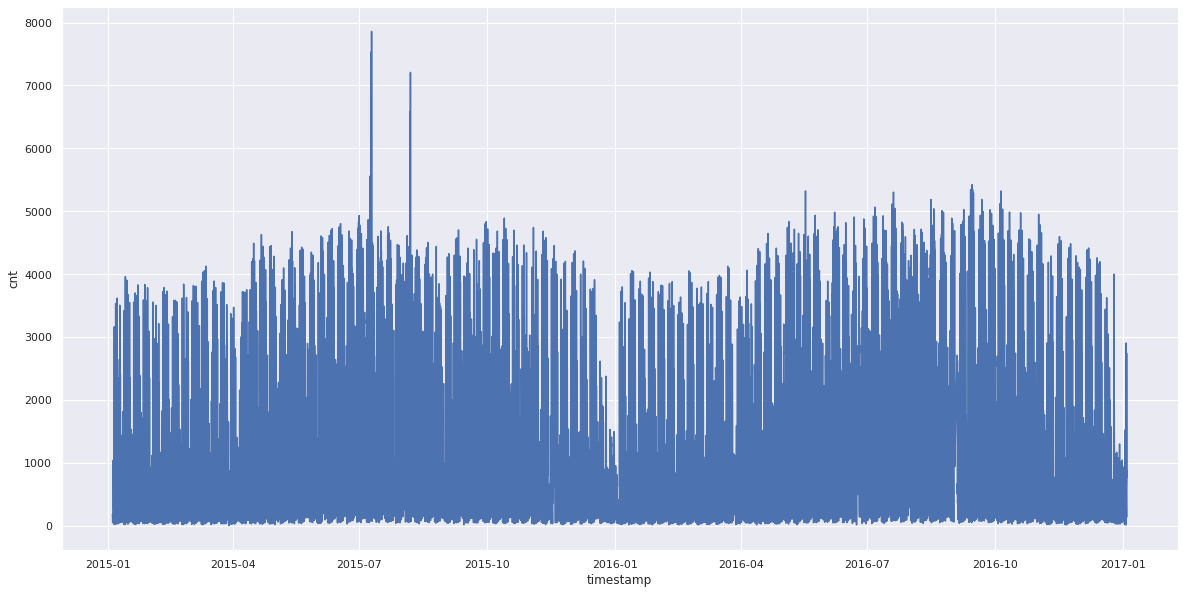

In [8]:
new_df = df.groupby('timestamp').agg({'cnt': 'sum'})
sns.lineplot(x='timestamp', y='cnt', data=new_df)

3. Отлично! Предположим, что данные действительно нужно немного преобразовать. 
В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. 
Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum).
Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. 
Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:

data.resample(rule='D').column_name.sum() #способ 1

data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему

Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [9]:
time_cnt = new_df.resample(rule='D').cnt.sum()

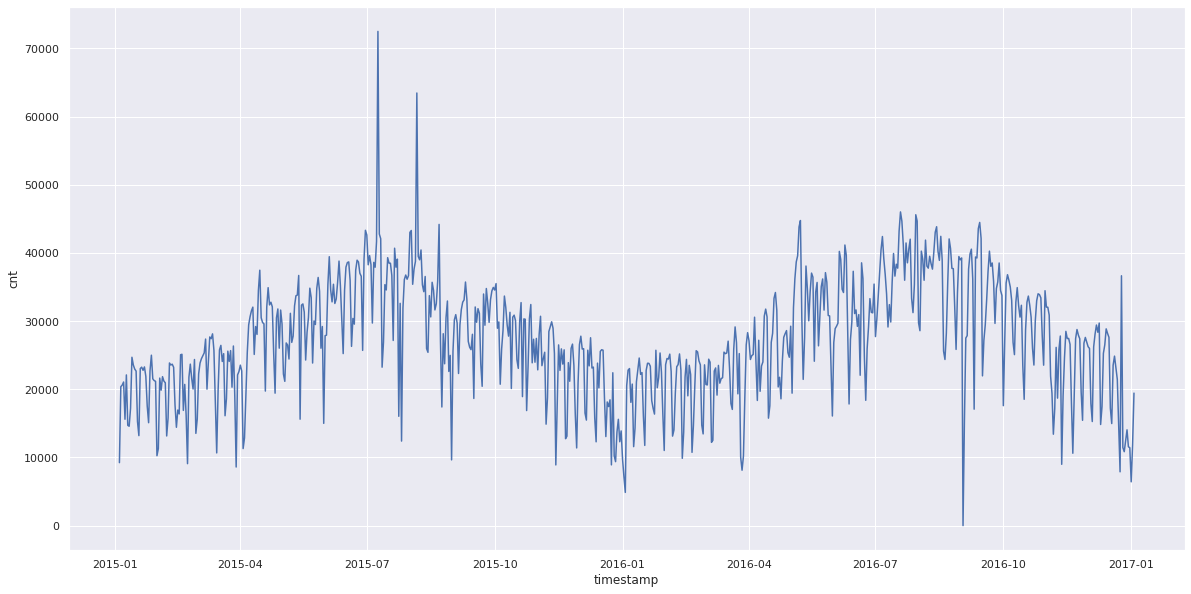

In [10]:
sns.lineplot(x='timestamp', y='cnt', data=time_cnt.reset_index())

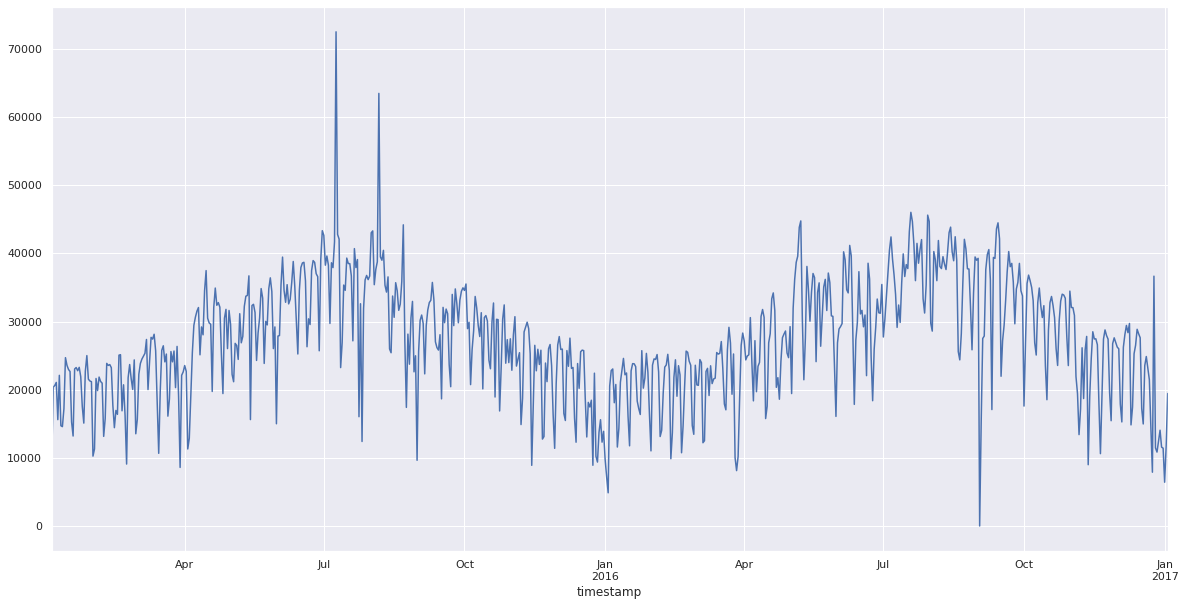

In [11]:
new_df.resample(rule='D').cnt.sum().plot() #удобнее тк можно увидеть месяцы

Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.

Для этого разделим дальнейшие действия на несколько этапов:

#пока не нужно делать:

1) сначала посчитаем скользящее среднее, чтобы сгладить ряд

2) далее – разницу между наблюдаемыми и сглаженными значениями

3) определим верхние и нижние границы 99% доверительного интервала

найдем причины аномалий!

4. !!!!На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте 
скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [12]:
roll_time_cnt = time_cnt.rolling(window=3).mean().reset_index()
roll_time_cnt.loc[roll_time_cnt['timestamp'] == "2015-07-09"]
#st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

,timestamp,cnt
186,2015-07-09,50705.0


5. Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. 
Далее – примените функцию для подсчета стандартного отклонения. Например:

c = a - b

std = np.std(c)

В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [15]:
roll_time_cnt['difference'] = time_cnt.values - roll_time_cnt.cnt
roll_time_cnt.head()

,timestamp,cnt,difference
0,2015-01-04,NaN,NaN
1,2015-01-05,NaN,NaN
2,2015-01-06,16739.666667,3873.333333
3,2015-01-07,20683.000000,381.000000
4,2015-01-08,19092.666667,-3491.666667


In [17]:
np.std(roll_time_cnt.difference).round(2)

4558.59

6. Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего,
и создать следующие объекты:

upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std

lower_bound – нижняя граница; вычитаем 2.576∗std

Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - 
иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().

In [18]:
roll_time_cnt['upper_bound'] = roll_time_cnt.cnt + 2.576 * np.std(roll_time_cnt.difference)
roll_time_cnt['lower_bound'] = roll_time_cnt.cnt - 2.576 * np.std(roll_time_cnt.difference)

In [19]:
roll_time_cnt.head()

,timestamp,cnt,difference,upper_bound,lower_bound
0,2015-01-04,NaN,NaN,NaN,NaN
1,2015-01-05,NaN,NaN,NaN,NaN
2,2015-01-06,16739.666667,3873.333333,28482.585854,4996.747479
3,2015-01-07,20683.000000,381.000000,32425.919188,8940.080812
4,2015-01-08,19092.666667,-3491.666667,30835.585854,7349.747479


In [ ]:
7. И наконец – изучим аномально высокие значения!

Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% 
доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [21]:
roll_time_cnt['true_cnt'] = time_cnt.reset_index().cnt
anomaly = roll_time_cnt.query('true_cnt > upper_bound')
anomaly

,timestamp,cnt,difference,upper_bound,lower_bound,true_cnt
186,2015-07-09,50705.000000,21799.000000,62447.919188,38962.080812,72504
214,2015-08-06,46627.333333,16840.666667,58370.252521,34884.414146,63468
609,2016-09-04,14259.000000,13253.000000,26001.919188,2516.080812,27512
721,2016-12-25,19650.666667,17002.333333,31393.585854,7907.747479,36653


In [23]:
anomaly.set_index('timestamp').true_cnt.idxmax()

Timestamp('2015-07-09 00:00:00')